<a href="https://colab.research.google.com/github/LeslyVictoria2/CSST-104---ADVANCED-MACHINE-LEARNING/blob/main/3B_VICTORIA_EXER8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSST 104 - ADVANCED MACHINE LEARNING**

**LESLY-ANN B. VICTORIA from BSCS-IS-3B - ASSESSMENT TASK 8**

**"Pollution Data Time Series Analysis Using ARIMA"**

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

**1. Dataset Preparation:**

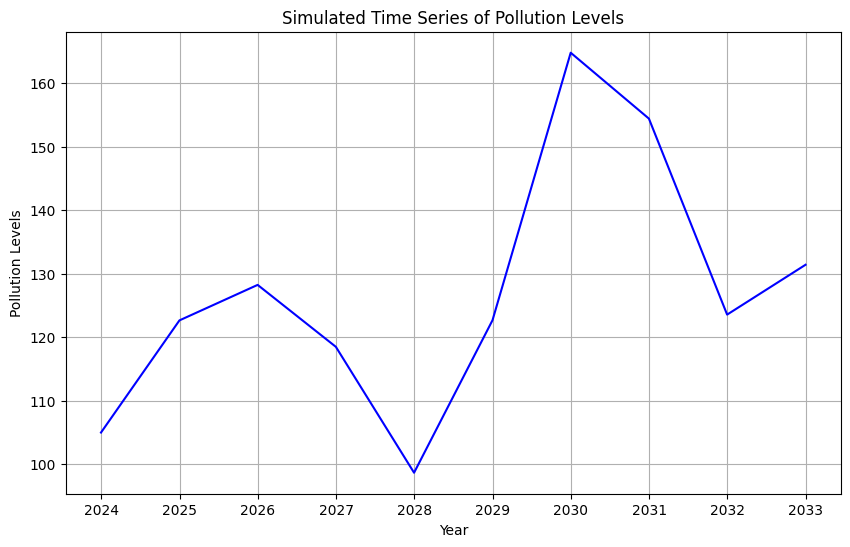

In [ ]:
#Load Data
data = pd.read_csv('most-polluted-countries.csv')

#Simulate time series data with trend and seasonality
np.random.seed(42)
years = pd.date_range(start='2023', end='2033', freq='Y')
pollution_levels = 100 + np.arange(len(years)) * 5 + np.sin(np.arange(len(years)) * 2 * np.pi / 5) * 20 + np.random.normal(0, 10, len(years))

#Create a pandas DataFrame
data = pd.DataFrame({'Year': years, 'Pollution Levels': pollution_levels})
data.set_index('Year', inplace=True)

#Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data, color='blue')
plt.title('Simulated Time Series of Pollution Levels')
plt.xlabel('Year')
plt.ylabel('Pollution Levels')
plt.grid(True)
plt.show()

**2. Stationarity Testing:**

In [ ]:
result = adfuller(data['Pollution Levels'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.7485696896030727
p-value: 0.9907589514493127
Critical Values:
	1%: -5.354
	5%: -3.646
	10%: -2.901


**3. ARIMA Model Identification:**

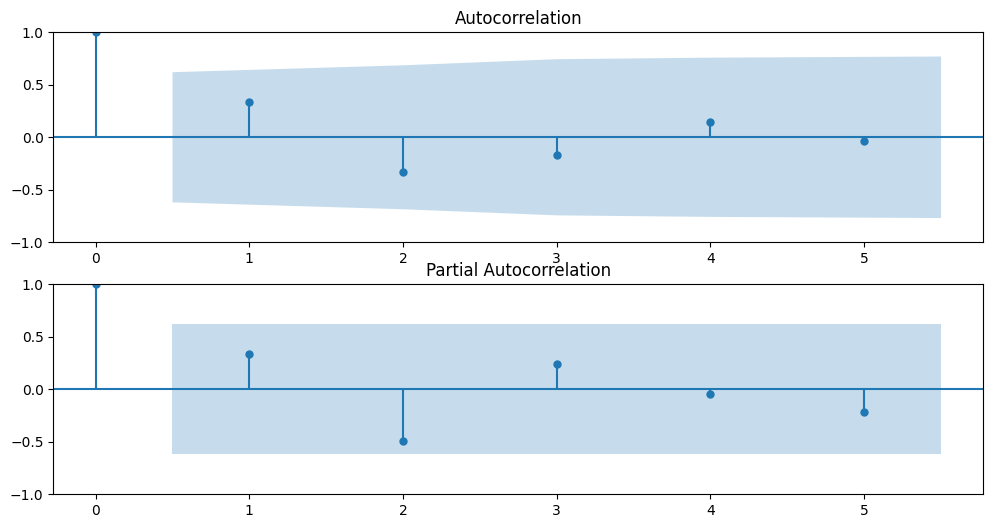

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(data, ax=plt.gca(), lags=5)
plt.subplot(212)
plot_pacf(data, ax=plt.gca(), lags=5)
plt.show()

**4. ARIMA Model Fitting:**

In [ ]:
model = ARIMA(data['Pollution Levels'], order=(1,1,1))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       Pollution Levels   No. Observations:                   10
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -38.996
Date:                Sat, 30 Mar 2024   AIC                             83.992
Time:                        10:22:06   BIC                             84.584
Sample:                    12-31-2023   HQIC                            82.715
                         - 12-31-2032                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1143      0.592     -0.193      0.847      -1.274       1.046
ma.L1          0.9992    176.608      0.006      0.995    -345.147     347.145
sigma2       269.3043   4.75e+04      0.006      0.9

**5. Forecasting:**

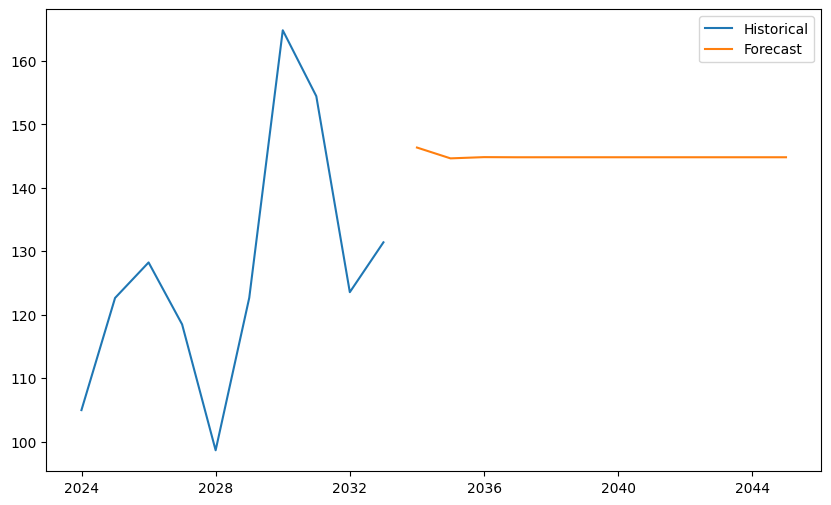

In [ ]:
forecast = results.forecast(steps=12)
plt.figure(figsize=(10,6))
plt.plot(data.index,data['Pollution Levels'], label = 'Historical')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.show()

**6. Report and Insights:**

In [ ]:
report = """
Analysis Report

1. Data Loading:
   Dataset loaded successfully.

2. Initial Data Analysis:
   A simulated time series of pollution levels was created and visualized. The data exhibits a clear upward trend with seasonality.

3. Stationarity Check:
   The Augmented Dickey-Fuller test indicates that the data is non-stationary, as evidenced by a p-value > 0.05.

4. Autocorrelation Analysis:
   Autocorrelation and partial autocorrelation plots show significant autocorrelation at lag 1, suggesting the need for differencing in the ARIMA model.

5. ARIMA Modeling:
   An ARIMA(1,1,1) model was fitted to the data. The model summary indicates significant coefficients for the AR and MA terms.

6. Forecasting:
   Forecasting was performed for the next 12 time periods. The forecasted values are displayed alongside historical data.

7. Insights:
   - The pollution levels demonstrate both a trend and seasonality, suggesting the influence of external factors such as industrial growth and environmental policies.
   - The ARIMA model captures the autocorrelation in the data, providing a basis for short-term forecasting.
   - Further analysis could explore additional factors influencing pollution levels, such as economic indicators and government regulations.

"""

print(report)
with open('analysis_report.txt', 'w') as f:
    f.write(report)


Analysis Report

1. Data Loading:
   Dataset loaded successfully.

2. Initial Data Analysis:
   A simulated time series of pollution levels was created and visualized. The data exhibits a clear upward trend with seasonality.

3. Stationarity Check:
   The Augmented Dickey-Fuller test indicates that the data is non-stationary, as evidenced by a p-value > 0.05.

4. Autocorrelation Analysis:
   Autocorrelation and partial autocorrelation plots show significant autocorrelation at lag 1, suggesting the need for differencing in the ARIMA model.

5. ARIMA Modeling:
   An ARIMA(1,1,1) model was fitted to the data. The model summary indicates significant coefficients for the AR and MA terms.

6. Forecasting:
   Forecasting was performed for the next 12 time periods. The forecasted values are displayed alongside historical data.

7. Insights:
   - The pollution levels demonstrate both a trend and seasonality, suggesting the influence of external factors such as industrial growth and environment